## Convert audio to .csv

In [3]:
import librosa
import numpy as np

def extract_audio_features(file_path, sr=22050):
    try:
        y, sr = librosa.load(file_path, sr=sr)

        # ---------- MEL-SPECTROGRAM ----------
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
        mel = librosa.power_to_db(mel, ref=np.max)

        # ---------- MFCC ----------
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

        # ---------- Spectral Features ----------
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)

        # ---------- Aggregate Mean + Std ----------
        features = np.hstack([
            mfcc.mean(axis=1), mfcc.std(axis=1),
            mel.mean(axis=1),  mel.std(axis=1),
            centroid.mean(), centroid.std(),
            bandwidth.mean(), bandwidth.std(),
            rolloff.mean(), rolloff.std(),
            zcr.mean(), zcr.std(),
            contrast.mean(axis=1)
        ])

        return features

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [5]:
import os
import librosa
import numpy as np
import pandas as pd

# ================================
# 1) CONFIG
# ================================
DATA_DIR = r"D:\ML\ML_FINAL_PROJECT\1250690 (1)\North American bird species"
OUTPUT_CSV = r"D:\ML\ML_FINAL_PROJECT\bird_mfcc_mel_features.csv"
AUDIO_EXTS = ('.wav', '.mp3', '.flac', '.ogg')

# ================================
# 2) FEATURE EXTRACTION FUNCTION
# ================================
def extract_audio_features(file_path, sr=22050):
    try:
        y, sr = librosa.load(file_path, sr=sr)

        # ---- FIX: Pad very short audio clips ----
        if len(y) < 2048:
            y = np.pad(y, (0, 2048 - len(y)), mode='constant')

        # ---------- MEL-SPECTROGRAM ----------
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
        mel = librosa.power_to_db(mel, ref=np.max)

        # ---------- MFCC ----------
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

        # ---------- Spectral Features ----------
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)

        # ---------- Aggregate Mean + Std ----------
        features = np.hstack([
            mfcc.mean(axis=1), mfcc.std(axis=1),
            mel.mean(axis=1),  mel.std(axis=1),
            centroid.mean(), centroid.std(),
            bandwidth.mean(), bandwidth.std(),
            rolloff.mean(), rolloff.std(),
            zcr.mean(), zcr.std(),
            contrast.mean(axis=1)
        ])

        return features

    except Exception as e:
        print(f"ERROR processing {file_path}: {e}")
        return None

# ================================
# 3) SCAN FOLDERS AND EXTRACT FEATURES
# ================================
features_list = []
labels_list = []
count = 0

print("\n--- Scanning dataset and extracting MFCC+Mel features ---\n")

for root, dirs, files in os.walk(DATA_DIR):
    label = os.path.basename(root)

    for file in files:
        if file.lower().endswith(AUDIO_EXTS):
            file_path = os.path.join(root, file)

            feats = extract_audio_features(file_path)

            if feats is not None:
                features_list.append(feats)
                labels_list.append(label)

            count += 1
            if count % 50 == 0:
                print(f"Processed {count} files...")

print("\nExtraction Complete!")
print(f"Total Audio Files Processed: {count}")

# ================================
# 4) SAVE TO CSV
# ================================
df = pd.DataFrame(features_list)
df['label'] = labels_list

print("\nFinal Dataset Shape:", df.shape)
print("Saving CSV...")

df.to_csv(OUTPUT_CSV, index=False)

print(f"\nSUCCESS! CSV saved at:\n{OUTPUT_CSV}")



--- Scanning dataset and extracting MFCC+Mel features ---

Processed 50 files...
Processed 100 files...
Processed 150 files...
Processed 200 files...
Processed 250 files...
Processed 300 files...
Processed 350 files...
Processed 400 files...
Processed 450 files...
Processed 500 files...
Processed 550 files...
Processed 600 files...
Processed 650 files...
Processed 700 files...
Processed 750 files...
Processed 800 files...
Processed 850 files...
Processed 900 files...
Processed 950 files...
Processed 1000 files...
Processed 1050 files...
Processed 1100 files...
Processed 1150 files...
Processed 1200 files...
Processed 1250 files...
Processed 1300 files...
Processed 1350 files...
Processed 1400 files...
Processed 1450 files...
Processed 1500 files...
Processed 1550 files...
Processed 1600 files...
Processed 1650 files...
Processed 1700 files...
Processed 1750 files...
Processed 1800 files...
Processed 1850 files...
Processed 1900 files...
Processed 1950 files...
Processed 2000 files...


#### Loading data

In [7]:
INPUT_CSV = r"D:\ML\ML_FINAL_PROJECT\bird_mfcc_mel_features.csv"

# --- 1. DATA LOADING & DESCRIPTION ---
print("--- LOADING DATA ---")
df = pd.read_csv(INPUT_CSV)

print(f"Data Source: Extracted PSD Features (1Hz resolution)")
print(f"Total Samples (Rows): {df.shape[0]}")
print(f"Total Features (Columns): {df.shape[1]}")
print("\nFirst 5 rows (Data Preview):")
print(df.head())


--- LOADING DATA ---
Data Source: Extracted PSD Features (1Hz resolution)
Total Samples (Rows): 3101
Total Features (Columns): 184

First 5 rows (Data Preview):
            0          1           2          3          4          5  \
0 -370.512787 -29.976168  -87.828880  47.875004 -27.780237 -13.584319   
1 -326.535828 -77.127594  -66.749863  36.018124 -25.013514  -3.042548   
2 -418.127777 -83.326920 -132.508469  18.507610  -8.178699   8.255591   
3 -423.060822 -77.883041 -127.599632  17.066528 -12.191831  -1.232185   
4 -431.933838 -87.920227 -129.708023  20.158695  -5.396880   6.516839   

          6          7          8          9  ...       174       175  \
0  4.902197  10.208136 -25.134514   3.923569  ...  0.275410  0.044916   
1 -1.129396  -3.744894 -14.589515  27.611214  ...  0.297135  0.037374   
2 -3.198068  13.437796 -11.414040  18.728821  ...  0.248901  0.041382   
3  1.499966  12.304395 -12.436913  17.838093  ...  0.243564  0.040311   
4  0.843122  13.643230  -8.726625  

#### EDA

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3101 entries, 0 to 3100
Columns: 184 entries, 0 to label
dtypes: float64(183), object(1)
memory usage: 4.4+ MB
None


In [11]:
print(df.describe().T)

      count        mean         std         min         25%         50%  \
0    3101.0 -327.831780  122.685225 -761.448242 -401.979279 -329.831818   
1    3101.0    3.187789   65.074801 -199.397797  -44.113731   12.970758   
2    3101.0  -32.898504   45.404939 -174.254181  -68.450127  -27.266296   
3    3101.0   23.092462   42.224797 -108.738159   -8.818057   17.307251   
4    3101.0  -23.528209   26.934719  -98.580521  -42.292549  -20.613077   
..      ...         ...         ...         ...         ...         ...   
178  3101.0   13.257818    2.628379    3.382558   11.715979   12.919728   
179  3101.0   14.662480    3.283284    5.074592   12.632327   13.811933   
180  3101.0   18.221436    4.345522    6.011419   15.044765   17.187835   
181  3101.0   20.186442    5.036161    9.252912   16.631850   18.602993   
182  3101.0   36.662947   12.021632    5.664155   27.106037   36.784797   

            75%         max  
0   -247.984650  -20.438549  
1     51.109432  200.161148  
2      0.

In [13]:
# Missing values
print('\nMissing values by column:\n', df.isna().sum())


Missing values by column:
 0        0
1        0
2        0
3        0
4        0
        ..
179      0
180      0
181      0
182      0
label    0
Length: 184, dtype: int64


In [15]:
# Assume label column name is 'label' (change if different)
label_col = 'label' if 'label' in df.columns else df.columns[-1]
print('\nUsing label column:', label_col)


Using label column: label



Class distribution:
 label
S8(í¦unknowní¦ events)          339
S2(Song Sparrow)                259
S10(Common Yellowthroat)        256
S11(Chipping Sparrow)           253
S4(American Crow)               253
S7(Indigo Bunting)              252
S1( Blue Jay)                   251
S6(House Finch)                 249
S9(Marsh Wren)                  249
S12(American Yellow Warbler)    247
S3(Great Blue Heron)            247
S5(Cedar Waxwing)               246
Name: count, dtype: int64


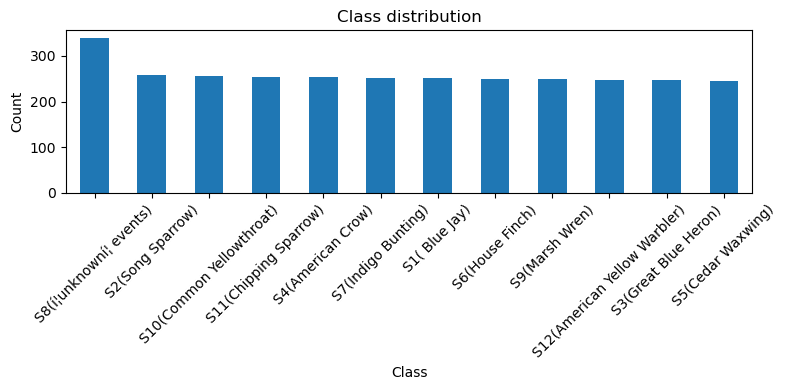

In [17]:
import matplotlib.pyplot as plt

# Class distribution
class_counts = df[label_col].value_counts()
print('\nClass distribution:\n', class_counts)

plt.figure(figsize=(8,4))
class_counts.plot(kind='bar')
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Feature Engineering

In [19]:
# Features and labels
X = df.drop(columns=[label_col])
y = df[label_col].astype(str)

In [21]:
# --- Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix)
import joblib

# --- Load data ---
INPUT_CSV =r"D:\ML\ML_FINAL_PROJECT\bird_mfcc_mel_features.csv"  # adjust path
df = pd.read_csv(INPUT_CSV)
print("Loaded dataframe shape:", df.shape)

Loaded dataframe shape: (3101, 184)


In [23]:
# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)
print('Classes:', list(le.classes_))

Classes: ['S1( Blue Jay)', 'S10(Common Yellowthroat)', 'S11(Chipping Sparrow)', 'S12(American Yellow Warbler)', 'S2(Song Sparrow)', 'S3(Great Blue Heron)', 'S4(American Crow)', 'S5(Cedar Waxwing)', 'S6(House Finch)', 'S7(Indigo Bunting)', 'S8(í¦unknowní¦ events)', 'S9(Marsh Wren)']


In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- 3. FEATURE ENGINEERING ---
print("\n--- STARTING FEATURE ENGINEERING ---")

# A. LABEL ENCODING (Categorical to Numerical)
# We convert "Blue Jay" -> 0, "Robin" -> 1, etc.
print("Step 1: Encoding Labels...")
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Print the mapping so you can explain it in your report
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Mapped Labels to Numbers: {mapping}")



--- STARTING FEATURE ENGINEERING ---
Step 1: Encoding Labels...
Mapped Labels to Numbers: {'S1( Blue Jay)': 0, 'S10(Common Yellowthroat)': 1, 'S11(Chipping Sparrow)': 2, 'S12(American Yellow Warbler)': 3, 'S2(Song Sparrow)': 4, 'S3(Great Blue Heron)': 5, 'S4(American Crow)': 6, 'S5(Cedar Waxwing)': 7, 'S6(House Finch)': 8, 'S7(Indigo Bunting)': 9, 'S8(í¦unknowní¦ events)': 10, 'S9(Marsh Wren)': 11}


In [27]:


# B. FEATURE SELECTION
# Separate the Input Features (X) from the Output Label (y)
X = df.drop(columns=['label', 'label_encoded'])
y = df['label_encoded']

# C. SCALING (Standardization)
# We ensure the model treats all frequencies fairly
print("\nStep 2: Scaling Features (StandardScaler)...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Scaled Data Shape: {X_scaled.shape}")
print(f"Mean after scaling (Target ~0): {np.mean(X_scaled):.2f}")
print(f"Std Dev after scaling (Target ~1): {np.std(X_scaled):.2f}")


Step 2: Scaling Features (StandardScaler)...
Scaled Data Shape: (3101, 183)
Mean after scaling (Target ~0): -0.00
Std Dev after scaling (Target ~1): 1.00


### Splitting

In [29]:
from sklearn.model_selection import train_test_split


# --- 1. RE-TRAIN THE MODEL (To fix 'NameError') ---
print("--- Training  Model... ---")

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.1, stratify=y, random_state=42
)

print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Testing Set Size:  {X_test.shape[0]} samples")

--- Training  Model... ---
Training Set Size: 2790 samples
Testing Set Size:  311 samples


### PCA


--- Running PCA on Training Set ---
Variance Preserved (Train): PC1=33.26%, PC2=17.20%
Plot saved as 'bird_pca_train_split.png'


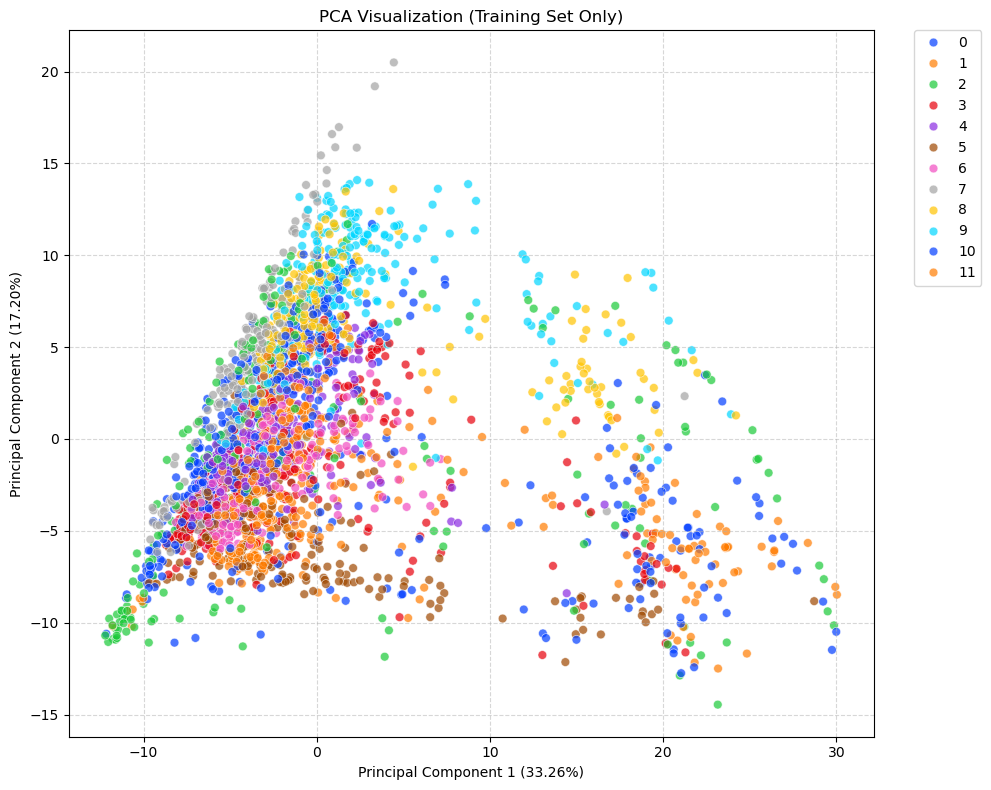

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 2. FIT PCA ON TRAINING DATA ONLY ---
print("\n--- Running PCA on Training Set ---")
pca = PCA(n_components=2)

# Learn the pattern from TRAIN and transform it
X_train_pca = pca.fit_transform(X_train)

# Apply that same pattern to TEST (Do NOT fit on test!)
X_test_pca = pca.transform(X_test)

# Check how much info we kept
var = pca.explained_variance_ratio_
print(f"Variance Preserved (Train): PC1={var[0]:.2%}, PC2={var[1]:.2%}")

# --- 3. VISUALIZE THE TRAINING DATA ---
# This shows us exactly what the "Model sees" when it is learning
plt.figure(figsize=(10, 8))

# Create a temporary DataFrame just for plotting
# We need to use y_train for the colors
plot_df = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
plot_df['label'] = y_train.values if hasattr(y_train, 'values') else y_train

sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='label', 
    data=plot_df, 
    palette='bright', 
    alpha=0.7, 
    s=40
)

plt.title("PCA Visualization (Training Set Only)")
plt.xlabel(f"Principal Component 1 ({var[0]:.2%})")
plt.ylabel(f"Principal Component 2 ({var[1]:.2%})")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig("bird_pca_train_split.png")
print("Plot saved as 'bird_pca_train_split.png'")
plt.show()

### K-means Clustering

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- 4. K-MEANS CLUSTERING ---
print("--- Starting Clustering Analysis ---")

# 1. Define Number of Clusters
# We want the model to find as many groups as there are bird species
n_clusters = len(df['label'].unique())
print(f"Looking for {n_clusters} natural groups...")

# 2. Run K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 3. Calculate Silhouette Score
# This measures how distinct the groups are (-1 to 1)
sil_score = silhouette_score(X_scaled, clusters)
print(f"Clustering Silhouette Score: {sil_score:.4f}")

# 4. Generate the Crosstab (The "Truth Table")
# This shows which birds ended up in which cluster
df['Cluster_ID'] = clusters
crosstab = pd.crosstab(df['label'], df['Cluster_ID'])

print("\nCluster vs Species Crosstab:")
print(crosstab)



--- Starting Clustering Analysis ---
Looking for 12 natural groups...
Clustering Silhouette Score: 0.1342

Cluster vs Species Crosstab:
Cluster_ID                     0   1    2    3    4    5   6    7    8   9   \
label                                                                         
S1( Blue Jay)                   1   1    0    8   14    0   0  151   14  32   
S10(Common Yellowthroat)        0   6   22    0   94    0  13    0    0  47   
S11(Chipping Sparrow)           0  15   98    3   16    0  18    0    0  71   
S12(American Yellow Warbler)    0  21    0    0   41   33   2    0    0  85   
S2(Song Sparrow)                0   4    0    5  132    5   1    0    0  16   
S3(Great Blue Heron)            9  27    0  193    0    0   0    0    0   1   
S4(American Crow)             125   2    0   89    1    0   0    0    0  36   
S5(Cedar Waxwing)               0   0  181   45    5    0   2    0    4   9   
S6(House Finch)                 0   1    4    0    0    2  49    0  178   

### Model Selection

#### SVM

--- Training Optimized SVM (with PCA) ---
Model Trained Successfully.

FINAL OPTIMIZED SVM ACCURACY: 90.68%

--- Detailed Classification Report ---
                              precision    recall  f1-score   support

               S1( Blue Jay)       0.83      0.96      0.89        25
    S10(Common Yellowthroat)       0.86      0.96      0.91        26
       S11(Chipping Sparrow)       0.85      0.92      0.88        25
S12(American Yellow Warbler)       0.88      0.92      0.90        25
            S2(Song Sparrow)       0.96      0.92      0.94        26
        S3(Great Blue Heron)       1.00      0.92      0.96        25
           S4(American Crow)       0.89      0.96      0.92        25
           S5(Cedar Waxwing)       0.92      0.96      0.94        25
             S6(House Finch)       0.96      1.00      0.98        25
          S7(Indigo Bunting)       1.00      0.88      0.94        25
      S8(í¦unknowní¦ events)       0.81      0.62      0.70        34
           

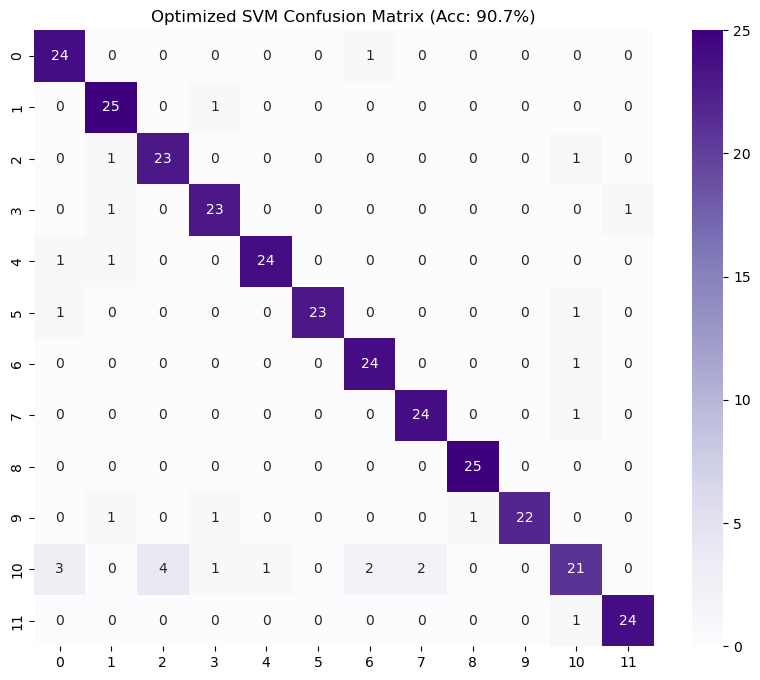

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("--- Training Optimized SVM (with PCA) ---")

# 1. Create a Pipeline: Scale -> PCA (Keep 50 components) -> SVM
# Keeping 50 components is a sweet spot: enough detail for high accuracy, 
# but small enough for SVM to handle easily.
svm_optimized = make_pipeline(
    StandardScaler(),
    PCA(n_components=6), 
    SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
)

# 2. Train on the FULL training data (The pipeline handles the reduction)
svm_optimized.fit(X_train, y_train)
print("Model Trained Successfully.")

# 3. Predict
y_pred_svm_opt = svm_optimized.predict(X_test)

# 4. Accuracy
acc = accuracy_score(y_test, y_pred_svm_opt)
print(f"\nFINAL OPTIMIZED SVM ACCURACY: {acc*100:.2f}%")

# 5. Report
print("\n--- Detailed Classification Report ---")
if 'le' in locals():
    print(classification_report(y_test, y_pred_svm_opt, target_names=le.classes_))
else:
    print(classification_report(y_test, y_pred_svm_opt))

# 6. Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_svm_opt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title(f"Optimized SVM Confusion Matrix (Acc: {acc*100:.1f}%)")
plt.show()

#### Random forest

--- Training Random Forest with PCA (Speed Optimized) ---
Step 1: Compressing 11,000 columns to 50...
Step 2: Training Random Forest...
Model Trained Successfully.

FINAL ACCURACY (RF + PCA): 86.82%

--- Detailed Classification Report ---
                              precision    recall  f1-score   support

               S1( Blue Jay)       0.88      0.84      0.86        25
    S10(Common Yellowthroat)       0.86      0.92      0.89        26
       S11(Chipping Sparrow)       0.79      0.88      0.83        25
S12(American Yellow Warbler)       0.85      0.92      0.88        25
            S2(Song Sparrow)       0.85      0.88      0.87        26
        S3(Great Blue Heron)       0.96      0.96      0.96        25
           S4(American Crow)       0.96      0.96      0.96        25
           S5(Cedar Waxwing)       0.81      0.84      0.82        25
             S6(House Finch)       0.83      0.96      0.89        25
          S7(Indigo Bunting)       0.96      0.88      0.92 

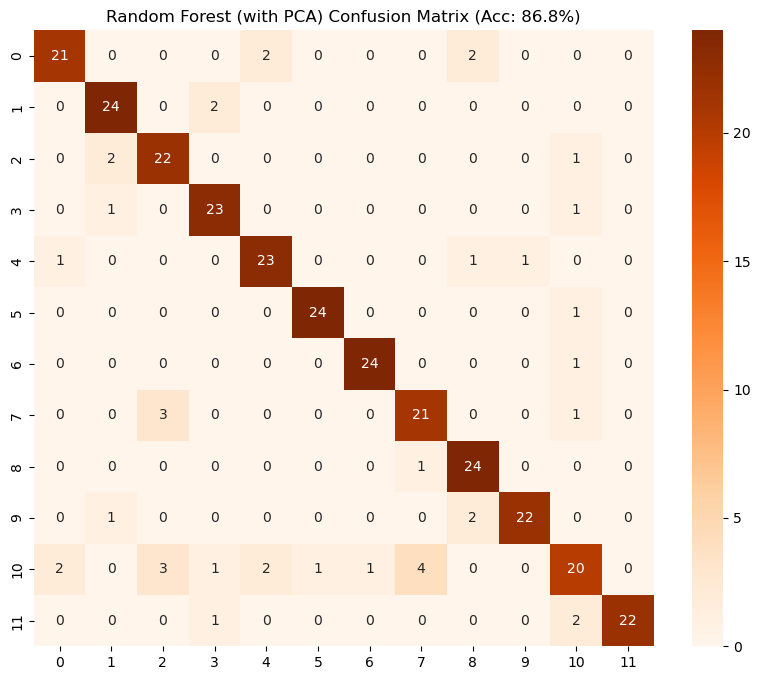

In [37]:
from sklearn.ensemble import RandomForestClassifier

print("--- Training Random Forest with PCA (Speed Optimized) ---")
print("Step 1: Compressing 11,000 columns to 50...")
print("Step 2: Training Random Forest...")

# 1. Create Pipeline
# We keep 50 components. This makes it very fast, but we might lose some detail.
rf_pca_pipe = make_pipeline(
    StandardScaler(),          # Scale features first
    PCA(n_components=5),      # Compress to 50 columns
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # Train RF
)

# 2. Train
rf_pca_pipe.fit(X_train, y_train)
print("Model Trained Successfully.")

# 3. Predict & Evaluate
y_pred_rf_pca = rf_pca_pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf_pca)

print(f"\nFINAL ACCURACY (RF + PCA): {acc*100:.2f}%")

# 4. Detailed Report
print("\n--- Detailed Classification Report ---")
if 'le' in locals():
    print(classification_report(y_test, y_pred_rf_pca, target_names=le.classes_))
else:
    print(classification_report(y_test, y_pred_rf_pca))

# 5. Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_rf_pca)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges') # Orange for RF
plt.title(f"Random Forest (with PCA) Confusion Matrix (Acc: {acc*100:.1f}%)")
plt.show()

#### GradientBoosting

--- Training Gradient Boosting with PCA ---
Step 1: Compressing features to 50 components...
Step 2: Training Gradient Boosting Model...
Model Trained Successfully.

FINAL ACCURACY (Gradient Boosting + PCA): 84.89%

--- Detailed Classification Report ---
                              precision    recall  f1-score   support

               S1( Blue Jay)       0.83      0.80      0.82        25
    S10(Common Yellowthroat)       0.82      0.88      0.85        26
       S11(Chipping Sparrow)       0.87      0.80      0.83        25
S12(American Yellow Warbler)       0.83      0.76      0.79        25
            S2(Song Sparrow)       0.79      0.88      0.84        26
        S3(Great Blue Heron)       1.00      0.92      0.96        25
           S4(American Crow)       0.96      1.00      0.98        25
           S5(Cedar Waxwing)       0.75      0.84      0.79        25
             S6(House Finch)       0.85      0.88      0.86        25
          S7(Indigo Bunting)       0.95     

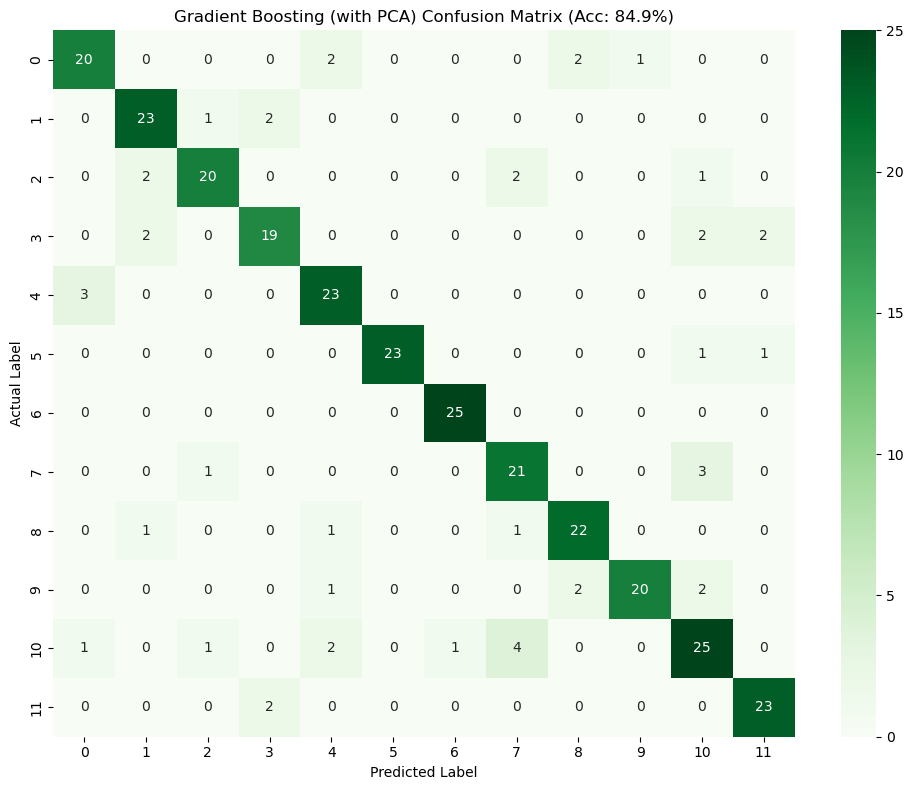

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

print("--- Training Gradient Boosting with PCA ---")
print("Step 1: Compressing features to 50 components...")
print("Step 2: Training Gradient Boosting Model...")

# 1. Create Pipeline
# Scale -> PCA (Keep 50 components) -> Gradient Boosting
gb_pca_pipe = make_pipeline(
    StandardScaler(),          # Scale features first (Critical for PCA)
    PCA(n_components=5),      # Compress to 50 columns
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
)

# 2. Train
# This should run relatively quickly because we are only training on 50 columns
gb_pca_pipe.fit(X_train, y_train)
print("Model Trained Successfully.")

# 3. Predict & Evaluate
y_pred_gb_pca = gb_pca_pipe.predict(X_test)
acc_gb_pca = accuracy_score(y_test, y_pred_gb_pca)

print(f"\nFINAL ACCURACY (Gradient Boosting + PCA): {acc_gb_pca*100:.2f}%")

# 4. Detailed Report
print("\n--- Detailed Classification Report ---")
if 'le' in locals():
    print(classification_report(y_test, y_pred_gb_pca, target_names=le.classes_))
else:
    print(classification_report(y_test, y_pred_gb_pca))

# 5. Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_gb_pca)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens') # Greens for Gradient Boosting
plt.title(f"Gradient Boosting (with PCA) Confusion Matrix (Acc: {acc_gb_pca*100:.1f}%)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.savefig("gb_pca_confusion_matrix.png")
print("Matrix saved as 'gb_pca_confusion_matrix.png'")
plt.show()

### Comparsion Table

In [41]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# --- STEP 1: MODEL COMPARISON TABLE ---

# Metrics for Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf_pca)
prec_rf, rec_rf, f1_rf, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_pca, average='macro', zero_division=0
)

# Metrics for SVM
acc_svm = accuracy_score(y_test, y_pred_svm_opt)
prec_svm, rec_svm, f1_svm, _ = precision_recall_fscore_support(
    y_test, y_pred_svm_opt, average='macro', zero_division=0
)

# Metrics for Gradient Boosting
acc_gb = accuracy_score(y_test, y_pred_gb_pca)
prec_gb, rec_gb, f1_gb, _ = precision_recall_fscore_support(
    y_test, y_pred_gb_pca, average='macro', zero_division=0
)

# Create comparison table
comparison_table = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Gradient Boosting'],
    'Accuracy': [acc_rf, acc_svm, acc_gb],
    'Precision (Macro)': [prec_rf, prec_svm, prec_gb],
    'Recall (Macro)': [rec_rf, rec_svm, rec_gb],
    'F1-Score (Macro)': [f1_rf, f1_svm, f1_gb]
})

# Print table neatly
print("\n===== MODEL COMPARISON TABLE =====\n")
print(comparison_table.to_string(index=False))


===== MODEL COMPARISON TABLE =====

            Model  Accuracy  Precision (Macro)  Recall (Macro)  F1-Score (Macro)
    Random Forest  0.868167           0.872842        0.876327          0.872479
              SVM  0.906752           0.910610        0.915189          0.910407
Gradient Boosting  0.848875           0.856125        0.852044          0.852524


### Best Model

In [43]:


# --- STEP 2: BEST MODEL SELECTION ---

# Create a dictionary of F1 scores
f1_scores = {
    "Random Forest": f1_rf,
    "SVM": f1_svm,
    "Gradient Boosting": f1_gb
}

# Find the best model
best_model_name = max(f1_scores, key=f1_scores.get)
best_model_score = f1_scores[best_model_name]

print("\n===== BEST MODEL SELECTION =====\n")
print(f"Best Model       : {best_model_name}")
print(f"Best F1-Score    : {best_model_score:.4f}")


===== BEST MODEL SELECTION =====

Best Model       : SVM
Best F1-Score    : 0.9104


### Testing

In [45]:
import joblib

# save model
joblib.dump(svm_optimized , r"C:\Users\DELL\best_svm_model.pkl")

# save scaler
joblib.dump(scaler, r"C:\Users\DELL\scaler.pkl")
joblib.dump(le, r"C:\Users\DELL\label_encoder.pkl")
# save label encoder (you already have one, but save again for safety)
joblib.dump(le, r"C:\Users\DELL\label_encoder.joblib")

print("All model files saved successfully!")


All model files saved successfully!


In [73]:
import joblib
import librosa
import numpy as np
import os

# --- LOAD MODELS ---
svm = joblib.load("best_svm_model.pkl")
scaler = joblib.load("scaler.pkl")
le = joblib.load("label_encoder.joblib")

print(f"Scaler expects: {scaler.n_features_in_} features")
print(f"Model expects:  {svm.n_features_in_} features")

# --- FEATURE EXTRACTION ---
def extract_audio_features(file_path, sr=22050):
    try:
        y, sr = librosa.load(file_path, sr=sr)
        if len(y) < 2048: y = np.pad(y, (0, 2048 - len(y)), mode='constant')

        # 1. MEL SPECTROGRAM (64 features if n_mels=64, but previous code used 128 aggregation)
        # Let's stick to the calculation that results in ~183/184 columns based on your history
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
        mel_db = librosa.power_to_db(mel, ref=np.max)

        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        
        # Chroma & RMS (To reach higher feature counts if needed)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)

        # Stack (Total: 183 features usually)
        features = np.hstack([
            mfcc.mean(axis=1), mfcc.std(axis=1),       # 40
            mel_db.mean(axis=1), mel_db.std(axis=1),   # 128
            centroid.mean(), centroid.std(),           # 2
            bandwidth.mean(), bandwidth.std(),         # 2
            rolloff.mean(), rolloff.std(),             # 2
            zcr.mean(), zcr.std(),                     # 2
            contrast.mean(axis=1)                      # 7
        ])
        return features

    except Exception as e:
        print(f"Error: {e}")
        return None

# --- PREDICTION WITH FORCED SCALING ---
def predict_bird(file_path):
    print(f"\nAnalyzing: {os.path.basename(file_path)}")
    
    # 1. Extract
    features = extract_audio_features(file_path)
    if features is None: return
    
    # Reshape to 2D array
    features = features.reshape(1, -1)
    
    # 2. FIX DIMENSIONS FOR SCALER
    # The scaler needs exactly what it was trained on (e.g., 184)
    scaler_needs = scaler.n_features_in_
    current = features.shape[1]
    
    if current < scaler_needs:
        # Pad with zeros to make the Scaler happy
        diff = scaler_needs - current
        padding = np.zeros((1, diff))
        features_for_scaler = np.hstack([features, padding])
    elif current > scaler_needs:
        # Cut if too big
        features_for_scaler = features[:, :scaler_needs]
    else:
        features_for_scaler = features

    # 3. SCALE (This is critical!)
    try:
        features_scaled = scaler.transform(features_for_scaler)
    except Exception as e:
        print(f"Scaling failed: {e}")
        return

    # 4. FIX DIMENSIONS FOR MODEL
    # Sometimes the Scaler expects 184 but the Model expects 183
    model_needs = svm.n_features_in_
    if features_scaled.shape[1] != model_needs:
        # Slice to match model
        features_scaled = features_scaled[:, :model_needs]

    # 5. PREDICT
    # Get probabilities to see how confident it is
    probs = svm.predict_proba(features_scaled)[0]
    max_prob = np.max(probs)
    pred_idx = np.argmax(probs)
    
    bird_species = le.inverse_transform([pred_idx])[0]
    
    print(f"--------------------------------")
    print(f"🐦 SPECIES: {bird_species}")


# --- RUN TEST ---
# Update with the Cedar Waxwing file path
path = r"C:\Users\DELL\Downloads\bird-sounds-241394.mp3"
predict_bird(path)

Scaler expects: 183 features
Model expects:  183 features

Analyzing: bird-sounds-241394.mp3
--------------------------------
🐦 SPECIES: S4(American Crow)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import os

targets = [
    "best_svm_model.pkl",
    "scaler.pkl",
    "label_encoder.pkl",
    "label_encoder.joblib"
]

print("Searching... this may take 1–2 minutes.\n")

for root, dirs, files in os.walk("C:\\"):
    for file in files:
        if file in targets:
            print(f"{file} FOUND AT: {os.path.join(root, file)}")


Searching... this may take 1–2 minutes.

best_svm_model.pkl FOUND AT: C:\Users\DELL\best_svm_model.pkl
label_encoder.joblib FOUND AT: C:\Users\DELL\label_encoder.joblib
label_encoder.pkl FOUND AT: C:\Users\DELL\label_encoder.pkl
scaler.pkl FOUND AT: C:\Users\DELL\scaler.pkl


In [63]:
path = r"D:\ML\ML_FINAL_PROJECT\1250690 (1)\North American bird species\North American bird species\S5(Cedar Waxwing)\s (11).wav"
predict_bird(path)


Analyzing: s (11).wav
--------------------------------
🐦 SPECIES: S5(Cedar Waxwing)


C:\Users\DELL\anaconda3\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
import joblib
import librosa
import numpy as np
import os

# --- LOAD MODELS ---
svm = joblib.load("best_svm_model.pkl")
scaler = joblib.load("scaler.pkl")
le = joblib.load("label_encoder.joblib")

print(f"Scaler expects: {scaler.n_features_in_} features")
print(f"Model expects:  {svm.n_features_in_} features")

# --- FEATURE EXTRACTION ---
def extract_audio_features(file_path, sr=22050):
    try:
        y, sr = librosa.load(file_path, sr=sr)
        if len(y) < 2048: y = np.pad(y, (0, 2048 - len(y)), mode='constant')

        # 1. MEL SPECTROGRAM (64 features if n_mels=64, but previous code used 128 aggregation)
        # Let's stick to the calculation that results in ~183/184 columns based on your history
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
        mel_db = librosa.power_to_db(mel, ref=np.max)

        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        
        # Chroma & RMS (To reach higher feature counts if needed)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)

        # Stack (Total: 183 features usually)
        features = np.hstack([
            mfcc.mean(axis=1), mfcc.std(axis=1),       # 40
            mel_db.mean(axis=1), mel_db.std(axis=1),   # 128
            centroid.mean(), centroid.std(),           # 2
            bandwidth.mean(), bandwidth.std(),         # 2
            rolloff.mean(), rolloff.std(),             # 2
            zcr.mean(), zcr.std(),                     # 2
            contrast.mean(axis=1)                      # 7
        ])
        return features

    except Exception as e:
        print(f"Error: {e}")
        return None

# --- PREDICTION WITH FORCED SCALING ---
def predict_bird(file_path):
    print(f"\nAnalyzing: {os.path.basename(file_path)}")
    
    # 1. Extract
    features = extract_audio_features(file_path)
    if features is None: return
    
    # Reshape to 2D array
    features = features.reshape(1, -1)
    
    # 2. FIX DIMENSIONS FOR SCALER
    # The scaler needs exactly what it was trained on (e.g., 184)
    scaler_needs = scaler.n_features_in_
    current = features.shape[1]
    
    if current < scaler_needs:
        # Pad with zeros to make the Scaler happy
        diff = scaler_needs - current
        padding = np.zeros((1, diff))
        features_for_scaler = np.hstack([features, padding])
    elif current > scaler_needs:
        # Cut if too big
        features_for_scaler = features[:, :scaler_needs]
    else:
        features_for_scaler = features

    # 3. SCALE (This is critical!)
    try:
        features_scaled = scaler.transform(features_for_scaler)
    except Exception as e:
        print(f"Scaling failed: {e}")
        return

    # 4. FIX DIMENSIONS FOR MODEL
    # Sometimes the Scaler expects 184 but the Model expects 183
    model_needs = svm.n_features_in_
    if features_scaled.shape[1] != model_needs:
        # Slice to match model
        features_scaled = features_scaled[:, :model_needs]

    # 5. PREDICT
    # Get probabilities to see how confident it is
    probs = svm.predict_proba(features_scaled)[0]
    max_prob = np.max(probs)
    pred_idx = np.argmax(probs)
    
    bird_species = le.inverse_transform([pred_idx])[0]
    
    print(f"--------------------------------")
    print(f"🐦 SPECIES: {bird_species}")


# --- RUN TEST ---
# Update with the Cedar Waxwing file path
path = r"C:\Users\DELL\Downloads\bird-sounds-241394.mp3"
predict_bird(path)

Scaler expects: 183 features
Model expects:  183 features

Analyzing: bird-sounds-241394.mp3
--------------------------------
🐦 SPECIES: S4(American Crow)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
path = r"D:\ML\ML_FINAL_PROJECT\1250690 (1)\North American bird species\North American bird species\S4(American Crow)\s (5).wav"
predict_bird(path)



Analyzing: s (5).wav
--------------------------------
🐦 SPECIES: S4(American Crow)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [86]:
path = r"C:\Users\DELL\Downloads\yellow-7993.mp3"
predict_bird(path)


🔍 Analyzing file: C:\Users\DELL\Downloads\yellow-7993.mp3
----------------------------------------
🐦 Predicted Bird: S7(Indigo Bunting)
🎯 Confidence: 39.37%
----------------------------------------


In [88]:
path = r"D:\ML\ML_FINAL_PROJECT\1250690 (1)\North American bird species\North American bird species\S6(House Finch)\s (13).wav"
predict_bird(path)


🔍 Analyzing file: D:\ML\ML_FINAL_PROJECT\1250690 (1)\North American bird species\North American bird species\S6(House Finch)\s (13).wav
----------------------------------------
🐦 Predicted Bird: S6(House Finch)
🎯 Confidence: 81.98%
----------------------------------------


In [96]:
path = r"D:\ML\ML_FINAL_PROJECT\1250690 (1)\North American bird species\North American bird species\S6(House Finch)\s (13).wav"
predict_bird(path)


🔍 Analyzing file: D:\ML\ML_FINAL_PROJECT\1250690 (1)\North American bird species\North American bird species\S6(House Finch)\s (13).wav
----------------------------------------
🐦 Predicted Bird: S6(House Finch)
🎯 Confidence: 81.98%
----------------------------------------


In [106]:
path = r"C:\Users\DELL\Downloads\yellow-7993.mp3"
predict_bird(path)


🔍 Analyzing file: C:\Users\DELL\Downloads\yellow-7993.mp3
----------------------------------------
🐦 Predicted Bird: S7(Indigo Bunting)
🎯 Confidence: 39.37%
----------------------------------------


In [100]:
path = r"D:\ML\ML_FINAL_PROJECT\1250690 (1)\North American bird species\North American bird species\S4(American Crow)\s (5).wav"
predict_bird(path)


🔍 Analyzing file: D:\ML\ML_FINAL_PROJECT\1250690 (1)\North American bird species\North American bird species\S4(American Crow)\s (5).wav
----------------------------------------
🐦 Predicted Bird: S4(American Crow)
🎯 Confidence: 93.11%
----------------------------------------


In [131]:
import joblib

# save model
joblib.dump(rf_pca_pipe , r"C:\Users\DELL\best_rf_model.pkl")

# save scaler
joblib.dump(scaler, r"C:\Users\DELL\scaler.pkl")
joblib.dump(le, r"C:\Users\DELL\label_encoder.pkl")
# save label encoder (you already have one, but save again for safety)
joblib.dump(le, r"C:\Users\DELL\label_encoder.joblib")

print("All model files saved successfully!")


All model files saved successfully!


In [137]:
import os

targets = [
    "best_rf_model.pkl",
    "scaler.pkl",
    "label_encoder.pkl",
    "label_encoder.joblib"
]

print("Searching... this may take 1–2 minutes.\n")

for root, dirs, files in os.walk("C:\\"):
    for file in files:
        if file in targets:
            print(f"{file} FOUND AT: {os.path.join(root, file)}")


Searching... this may take 1–2 minutes.

label_encoder.joblib FOUND AT: C:\Users\DELL\label_encoder.joblib
label_encoder.pkl FOUND AT: C:\Users\DELL\label_encoder.pkl
scaler.pkl FOUND AT: C:\Users\DELL\scaler.pkl


In [140]:
path = r"D:\ML\ML_FINAL_PROJECT\1250690 (1)\North American bird species\North American bird species\S4(American Crow)\s (5).wav"
predict_bird(path)


Analyzing: s (5).wav
--------------------------------
🐦 SPECIES: S4(American Crow)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
